In [17]:
%matplotlib inline
import numpy as np
import importlib
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

import gridworld
gridworld = importlib.reload(gridworld)
GridWorld = gridworld.GridWorld
import policy_gradient 
import reinforce
policy_gradient = importlib.reload(policy_gradient)
reinforce = importlib.reload(reinforce)

Policy = policy_gradient.Policy
Reinforce = reinforce.Reinforce
#import seaborn as sns

# REINFORCE

Using derivation of gradient from L4

In [25]:
state_space = 25
action_space = 4

num_episodes = 500
num_samples = 20
num_step= 20
num_traj = 20
alpha=0.01 
gamma=1

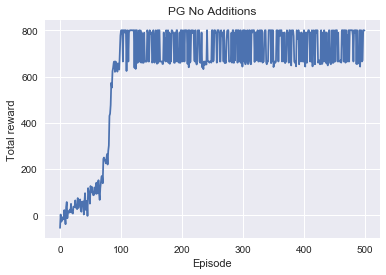

In [30]:
pg_none = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_none_rewards, rew_none = pg_none.train(num_episode=num_episodes, num_traj=num_traj, num_step=num_step, num_samples=num_samples, alpha=alpha)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("PG No Additions")
plt.plot(pg_none_rewards)
plt.show()

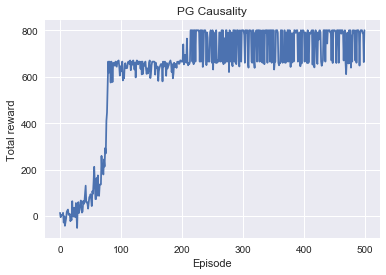

In [31]:
pg_caus = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_caus_rewards, rew_cau = pg_caus.train(num_episode=num_episodes, num_traj=num_traj, num_step=num_step, num_samples=num_samples, alpha=alpha)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("PG Causality")
plt.plot(pg_caus_rewards)
plt.show()

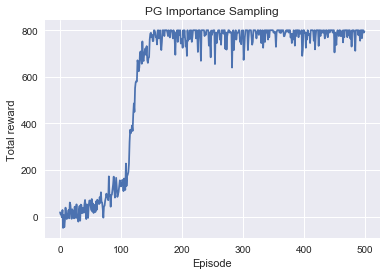

In [26]:
pg_imsa = Reinforce(GridWorld(),state_space,action_space,Policy())
pg_imsa_rewards, var_imsa = pg_imsa.train(num_episode=num_episodes, num_traj=num_traj, 
                                num_step=num_step, num_samples=num_samples, 
                                alpha=alpha, importance_sampling=True, causality=True)
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.title("PG Importance Sampling")
plt.plot(pg_imsa_rewards)
plt.show()

In [8]:
def showImagesHorizontally(list_of_images):
    fig = plt.figure(figsize=(50, 40))
    number_of_imgs = len(list_of_images)
    for i in range(number_of_imgs):
        a=fig.add_subplot(1,number_of_imgs,i+1)
        image = list_of_images[i]
        plt.imshow(image)
        plt.axis('off')

In [24]:
np.mean(np.var(np.sum(rew_none, axis=2))), np.mean(np.var(np.sum(rew_cau, axis=2))),  np.mean(np.var(np.sum(_, axis=2)))

(168.56644015999998, 141.73860544000001, 155.95817424000001)

In [29]:
np.mean(np.var(np.sum(var_imsa, axis=2)))

245.71789744000003